In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# country codes conversion
country_csv = ("country_codes.csv")
country_df = pd.read_csv(country_csv)
country_df2 = country_df[["Alpha-2 code","Alpha-3 code"]].copy()
country_df3 = country_df2.rename(columns={'Alpha-3 code': 'NOC'}, inplace = False)
country_df3.head()

,Alpha-2 code,NOC
0,AF,AFG
1,AX,ALA
2,AL,ALB
3,DZ,DZA
4,AS,ASM


In [3]:
path = ("athlete_events.csv")
df_events = pd.read_csv(path)


#df_events["join_id"] = df_events["NOC"] + df_events["Year"].astype(str)
# summer_df = df_events[df_events['Season'] == 'Summer']
# summer_df["BMI"] = summer_df["Weight"]/((summer_df["Height"]/100)**2)
# Add numerical value for medals? 3 = gold, 2= silver, 1 bronze and no medal = 0
df_events_a = pd.merge(df_events, country_df3, on="NOC")
df_events_a['join_id'] = df_events_a["NOC"] + df_events_a["Year"].astype(str)
df_events_a.head(10)



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Alpha-2 code,join_id
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CN,CHN1992
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CN,CHN2012
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,CN,CHN2000
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,CN,CHN2016
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,CN,CHN2006
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,CN,CHN2006
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,CN,CHN1998
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,CN,CHN1998


In [4]:
path3 = ("country_lat_long.csv")
lat_long_df = pd.read_csv(path3)
lat_long_df2 = lat_long_df.rename(columns={'country': 'Alpha-2 code'})
lat_long_df2


,Alpha-2 code,latitude,longitude,name,NOC
0,AD,42.546245,1.601554,Andorra,AND
1,AE,23.424076,53.847818,United Arab Emirates,ARE
2,AF,33.939110,67.709953,Afghanistan,AFG
3,AG,17.060816,-61.796428,Antigua and Barbuda,ATG
4,AI,18.220554,-63.068615,Anguilla,AIA
...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,YEM
241,YT,-12.827500,45.166244,Mayotte,MYT
242,ZA,-30.559482,22.937506,South Africa,ZAF
243,ZM,-13.133897,27.849332,Zambia,ZMB


In [5]:
# lat_long_df2['join_id'] =  lat_long_df2["Alpha-2 code"] + lat_long_df2["Year"].astype(str)
df_events_b = pd.merge(df_events_a, lat_long_df2, on="Alpha-2 code")
df_events_b.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,City,Sport,Event,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,CN,CHN1992,35.86166,104.195397,China,CHN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,CN,CHN2012,35.86166,104.195397,China,CHN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,Sydney,Boxing,Boxing Men's Middleweight,NaN,CN,CHN2000,35.86166,104.195397,China,CHN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004,35.86166,104.195397,China,CHN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016,35.86166,104.195397,China,CHN


In [6]:
# population
path4 = ("population_by_country.csv")
pop_df = pd.read_csv(path4)
pop_df['join_id'] =  pop_df["NOC"] + pop_df["Year"].astype(str)
pop_df

,NOC,Year,Population,join_id
0,AFG,1936,12000000.0,AFG1936
1,AFG,1948,7000000.0,AFG1948
2,AFG,1956,7000000.0,AFG1956
3,AFG,1960,8996967.0,AFG1960
4,AFG,1964,9744772.0,AFG1964
...,...,...,...,...
3300,ZIM,2004,NaN,ZIM2004
3301,ZIM,2008,NaN,ZIM2008
3302,ZIM,2012,NaN,ZIM2012
3303,ZIM,2014,NaN,ZIM2014


In [7]:
df_events_c = pd.merge(df_events_b, pop_df, on="join_id")
df_events_c


,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year_x,...,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y,NOC,Year_y,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,CHN,1992,1.164970e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196756,120439,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,...,NaN,TV,TUV2008,-7.109535,177.649330,Tuvalu,TUV,TUV,2008,1.031500e+04
196757,66655,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04
196758,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04
196759,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,...,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,TUV,2012,1.074400e+04


In [8]:
df_country_summ = df_events_b.groupby(["NOC_x","Season"]).size().reset_index(name="Count")
df_country_summ

,NOC_x,Season,Count
0,AFG,Summer,126
1,ALB,Summer,63
2,ALB,Winter,7
3,AND,Summer,53
4,AND,Winter,116
...,...,...,...
191,UZB,Winter,31
192,VEN,Summer,918
193,VEN,Winter,7
194,VNM,Summer,62


In [9]:
## Copy to main
df_country_sum2 = df_country_summ.pivot(index=['NOC_x'], columns='Season', values=['Count'])
df_country_sum2.replace(np.nan,0,inplace=True)
df_country_sum2.reset_index(inplace=True)
df_country_sum2.columns = [' '.join(col).strip() for col in df_country_sum2.columns.values]

df_country_sum2.head()

,NOC_x,Count Summer,Count Winter
0,AFG,126.0,0.0
1,ALB,63.0,7.0
2,AND,53.0,116.0
3,ANT,133.0,0.0
4,ARG,2913.0,384.0


In [10]:
## Add correction to main

conditions = [
    (df_country_sum2['Count Summer']> 0) & (df_country_sum2['Count Winter'] > 0),
    (df_country_sum2['Count Summer']> 0) & (df_country_sum2['Count Winter'] == 0),
    (df_country_sum2['Count Summer'] == 0) & (df_country_sum2['Count Winter'] > 0)]
choices = [2, 1, 3]

df_country_sum2['summer_winter'] = np.select(conditions, choices, default=0)

df_country_sum2.head()

,NOC_x,Count Summer,Count Winter,summer_winter
0,AFG,126.0,0.0,1
1,ALB,63.0,7.0,2
2,AND,53.0,116.0,2
3,ANT,133.0,0.0,1
4,ARG,2913.0,384.0,2


In [11]:
## Add correction to main

df_events_d = pd.merge(df_events_b, df_country_sum2, on=["NOC_x"])
df_events_d = df_events_d.loc[df_events_d['Year'] >= 1924]

df_events_d.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y,Count Summer,Count Winter,summer_winter
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.86166,104.195397,China,CHN,4323.0,818.0,2
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,NaN,CN,CHN2012,35.86166,104.195397,China,CHN,4323.0,818.0,2
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,NaN,CN,CHN2000,35.86166,104.195397,China,CHN,4323.0,818.0,2
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,NaN,CN,CHN2004,35.86166,104.195397,China,CHN,4323.0,818.0,2
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,NaN,CN,CHN2016,35.86166,104.195397,China,CHN,4323.0,818.0,2


In [12]:
# this is just countries that attended both olympics

both_oly_df = df_events_d[df_events_d["summer_winter"] == 2]
both_oly_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year,...,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y,Count Summer,Count Winter,summer_winter
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,NaN,CN,CHN1992,35.86166,104.195397,China,CHN,4323.0,818.0,2
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,NaN,CN,CHN2012,35.86166,104.195397,China,CHN,4323.0,818.0,2
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,NaN,CN,CHN2000,35.86166,104.195397,China,CHN,4323.0,818.0,2
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,NaN,CN,CHN2004,35.86166,104.195397,China,CHN,4323.0,818.0,2
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,NaN,CN,CHN2016,35.86166,104.195397,China,CHN,4323.0,818.0,2


### When looking at countries that participated in both the winter and summer Olympics, is there a correlation between the season of the Olympics and the country’s participation in number of events?


In [13]:
total_games = both_oly_df.groupby(['Year', 'Season'], as_index=False).agg({'Event':'nunique'})

year_summer_df = total_games.loc[total_games["Season"]=="Summer"]
summer_df = year_summer_df.rename(columns={"Event": "Summer Events"})

year_winter_df = total_games.loc[total_games["Season"]=="Winter"]
winter_df = year_winter_df.rename(columns={"Event": "Winter Events"})

summer_winter_df = pd.merge(summer_df, winter_df, how='outer', on="Year")
summer_winter_df.drop(['Season_x', 'Season_y'], axis=1, inplace=True)
summer_winter_df.head()

,Year,Summer Events,Winter Events
0,1924,131.0,17.0
1,1928,122.0,14.0
2,1932,130.0,14.0
3,1936,147.0,17.0
4,1948,152.0,22.0


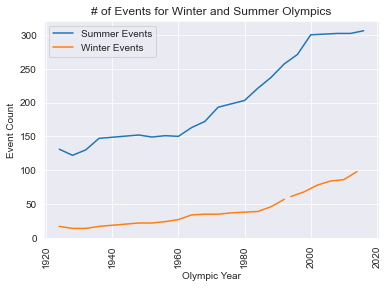

In [14]:
# Plot # of events for summer and winter olympics throughout history
year_index_df = summer_winter_df.set_index('Year')
year_index_df.plot(xticks=year_index_df.index)
plt.xticks(rotation=90)
plt.xlabel('Olympic Year')
plt.ylabel('Event Count')
plt.title('# of Events for Winter and Summer Olympics')
plt.gca().set_xscale('linear')
plt.show()

In [15]:
plt.savefig("output/# of events for winter and summer.png")

<Figure size 432x288 with 0 Axes>

## Graph 1: Total Number of Events for Winter and Summer Olympics Over Time

Graph: Line graph, includes countries that attended both the winter and summer olympics. 

Observations: 

1. The graph shows that the number of unique events has increased over time for both the winter and summer Olympics.
2. This graph does not provide any unexpect incite into the history of the games. For future investigation, I would be curious to look at specific sports.

In [16]:
# Create a dataframe with country participation and total # of events per year and add in percentage
# Country participation by year and season
country_participation = both_oly_df.groupby(['Year','NOC_x', 'Season'], as_index=False).agg({'Event':'nunique'})

# Add summer and winter count columns by year
winter_addins = country_participation[country_participation["Season"]=="Winter"]
winter_table_df = pd.merge(winter_addins, winter_df, how='inner', on="Year")
winter_table_df['Percent of Participation'] = winter_table_df['Event']/winter_table_df['Winter Events']*100
winter_table_df

summer_addins = country_participation[country_participation["Season"]=="Summer"]
summer_table_df = pd.merge(summer_addins, summer_df, how='inner', on="Year")
summer_table_df['Percent of Participation'] = summer_table_df['Event']/summer_table_df['Summer Events']*100
summer_table_df

winter_summer_table_df = pd.merge(summer_table_df, winter_table_df, how='outer', on=["Year", "NOC_x"])

winter_summer_table_df.drop(['Season_y_x', 'Season_y_y'], axis=1, inplace=True)

final_table = winter_summer_table_df.rename(columns={"Event_x": "# of Summer Events Competed",
                                      "Percent of Participation_x": "% of Summer Participation",
                                      "Percent of Participation_y": "% of Winter Participation",
                                      "Summer Count(b)": "Total # of Summer Events",
                                      "Event_y": "# of Winter Events Competed",
                                      "Winter Count(b)":"Total # of Summer Events"})

final_table.head()

,Year,NOC_x,Season_x_x,# of Summer Events Competed,Summer Events,% of Summer Participation,Season_x_y,# of Winter Events Competed,Winter Events,% of Winter Participation
0,1924,ARG,Summer,39.0,131.0,29.770992,NaN,NaN,NaN,NaN
1,1924,AUS,Summer,31.0,131.0,23.664122,Winter,1.0,17.0,5.882353
2,1924,AUT,Summer,27.0,131.0,20.610687,Winter,3.0,17.0,17.647059
3,1924,BEL,Summer,82.0,131.0,62.595420,Winter,8.0,17.0,47.058824
4,1924,BRA,Summer,15.0,131.0,11.450382,NaN,NaN,NaN,NaN


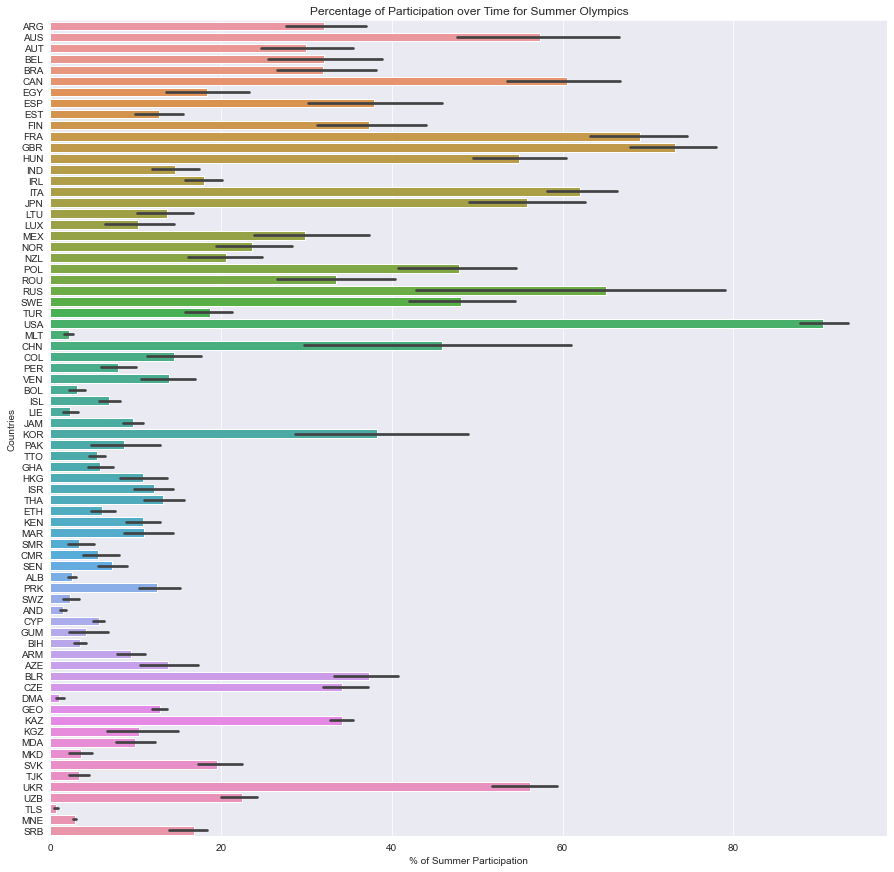

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(15,15))
sns.barplot(x= final_table['% of Summer Participation'], y= final_table['NOC_x'])
plt.xlabel('% of Summer Participation')
plt.ylabel('Countries')
plt.title('Percentage of Participation over Time for Summer Olympics')
plt.show()
plt.savefig("output/% of participation for summer olympics.png")

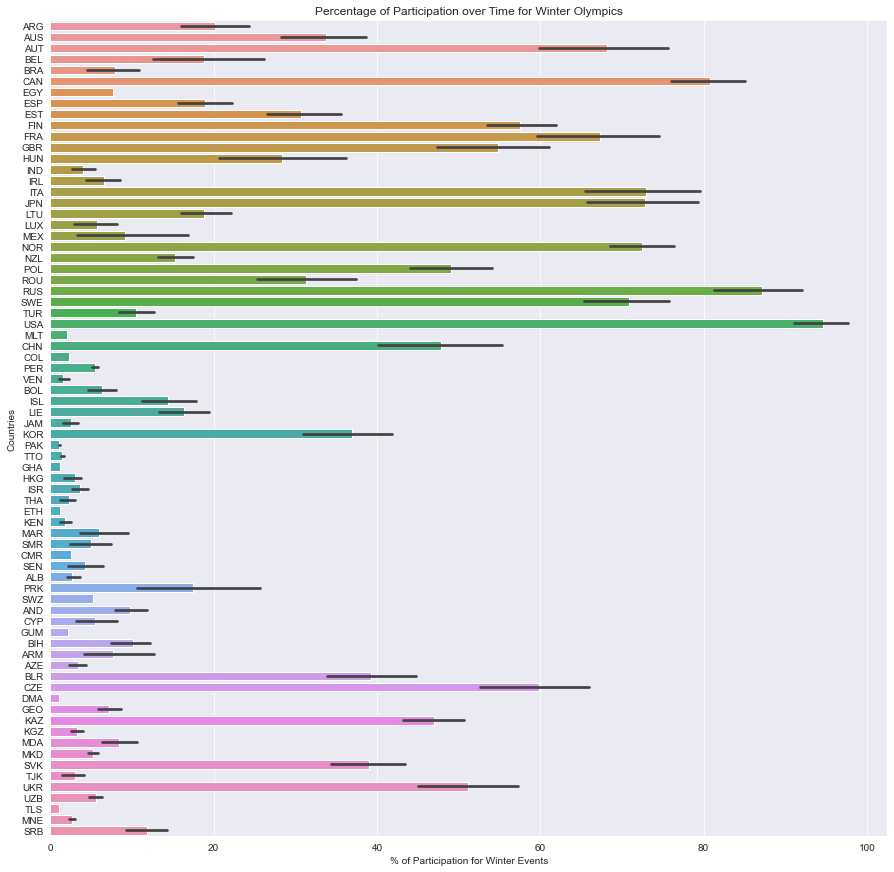

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(15,15))
sns.barplot(x= final_table['% of Winter Participation'], y= final_table['NOC_x'])
plt.xlabel('% of Participation for Winter Events')
plt.ylabel('Countries')
plt.title('Percentage of Participation over Time for Winter Olympics')
plt.show()
plt.savefig("output/% of participation for winter olympics.png")

In [19]:
# Find total number of unique participants
total_participants = df_events.groupby(['Year', 'Season'], as_index=False).agg({'Name':'nunique'})
total_participation = total_participants[total_participants['Year'] >= 1924]


summer_column = total_participation.loc[total_participation["Season"]=="Summer"]
summer_dfc = summer_column.rename(columns={"Name": "Summer"})

winter_column = total_participation.loc[total_participation["Season"]=="Winter"]
winter_dfc = winter_column.rename(columns={"Name": "Winter"})

summer_winter_df2 = pd.merge(summer_dfc, winter_dfc, how='outer', on="Year")
summer_winter_df2.drop(['Season_x', 'Season_y'], axis=1, inplace=True)
summer_winter_df2.head()


,Year,Summer,Winter
0,1924,3256.0,313.0
1,1928,3246.0,461.0
2,1932,1922.0,252.0
3,1936,4482.0,668.0
4,1948,4402.0,668.0


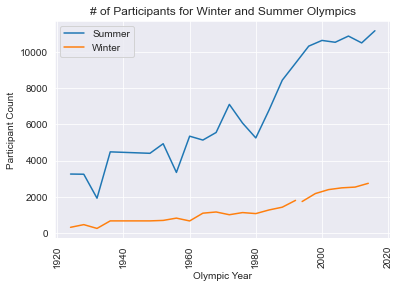

In [20]:
# Plot total # of participants for summer and winter olympics throughout history
year_a_index_df = summer_winter_df2.set_index('Year')
year_a_index_df.plot(xticks=year_a_index_df.index)
plt.xticks(rotation=90)
plt.xlabel('Olympic Year')
plt.ylabel('Participant Count')
plt.title('# of Participants for Winter and Summer Olympics')
plt.gca().set_xscale('linear')
plt.show()

In [21]:
plt.savefig("output/# of participants for winter and summer.png")

<Figure size 432x288 with 0 Axes>

## Graph 2: Total Number of Participants for Winter and Summer Olympics Over Time

Graph: Line graph, includes countries that attended both the winter and summer olympics. 

Observations: 

1. The graph shows that participation in events has increased over time for both the winter and summer Olympics.
2. There are large dips in the number of particpants for the summer Olympics in the years 1932, 1956, and 1980.  After doing more research, it was found that the decrease in particpation was due to world events. In 1932, the summer Olympics were held in the middle of the Great Depression. In 1956, the summer Olympics were boycotted by four teams in response to the Suez Crisis. Lastly, in 1980, the US led a boycott of the summer Olympics to protest the late 1979 Soviet invasion of Afghanistan.
3. Overall, there is no surprise in the increase in participation in Olympic events for there are more events, meaning more opportunities for athletes.